In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
cats = pd.read_csv('item_categories.csv')
train = pd.read_csv('sales_train.csv')

test  = pd.read_csv('test.csv').set_index('ID')

>test 데이터의 경우 ID를 나중에 드롭하는것을 피하기 위해서 index를 지정해줍니다.

In [3]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
test.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [8]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
test.isnull().sum()

shop_id    0
item_id    0
dtype: int64

>데이터 결측치는 없음

In [14]:
sum(train.duplicated()), sum(test.duplicated())

(6, 0)

In [16]:
sum(items.duplicated()), sum(cats.duplicated()), sum(shops.duplicated())

(0, 0, 0)

In [17]:
train[train.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [18]:
train.drop_duplicates(inplace=True)

>train 데이터에 중복 행이 6개 있으므로 제거해주었다. 여기서 중복을 제거 안하고 넘어가게되면
나중에 merge할때 문제가 발생한다

## 이상치 제거 

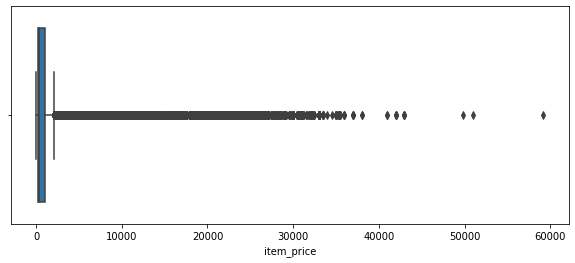

In [21]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)

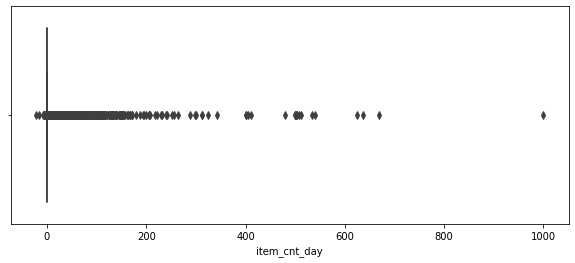

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)

In [23]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1001]

In [24]:
train = train[train.item_cnt_day >= 0]
train = train[train.item_price >= 0]

>train 데이터의 item_price, item_cnt_day 박스플롯 확인결과 이상치가 존재하므로 제거해주기로 한다. 또한 두 피처에 대해서 0보다 작은 데이터가 있으므로 제거해주기로 한다.

### shops

In [25]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [26]:
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])

>도시 이름을 간단하게 하기 위해서 shop_name을 수정해줍니다

In [27]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [28]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(list(shops['city'].values))
shops['city'] = lb.transform(list(shops['city'].values))

In [29]:
shops.drop(['shop_name'],axis=1, inplace=True)

> 이로써 shop_name 피처에 대해 라벨인코더를 시켜서 범주화 시켰고 문자형 데이터가 있는 피처는 드롭해주었다.

### cats

In [30]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [31]:
cats['split'] = cats['item_category_name'].str.split('-')

In [32]:
cats['type'] = cats['split'].map(lambda x: x[0].strip())

In [33]:
cats.head(3)

,item_category_name,item_category_id,split,type
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары


>item_category_name에서 변수들을 나눠주고 str함수를 이용하여 종류를 구분하였습니다

In [34]:
lb = LabelEncoder()
lb.fit(list(cats['type'].values))
cats['type_code'] = lb.transform(list(cats['type'].values))

In [35]:
cats.head(3)

,item_category_name,item_category_id,split,type,type_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1


> 라벨인코더를 이용하여 type_code 피처에 대해 처리해주었습니다.

In [36]:
cats['subtype'] = cats['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [37]:
lb = LabelEncoder()
lb.fit(list(cats['subtype'].values))
cats['subtype_code'] = lb.transform(list(cats['subtype'].values))

In [38]:
cats.head(3)

,item_category_name,item_category_id,split,type,type_code,subtype,subtype_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0,Гарнитуры/Наушники,29
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1,PS2,9
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1,PS3,10


In [39]:
cats = cats[['item_category_id','type_code', 'subtype_code']]

In [40]:
cats.head(3)

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10


> 라벨인코더를 해주고 문자형 데이터가 있는 변수들을 드롭해주었다

### itmes

In [41]:
items.drop(['item_name'], axis=1, inplace=True)

In [42]:
len(test.shop_id.unique())

42

In [43]:
len(list(set(test.item_id)))

5100

In [44]:
len(test)

214200

>42개의 shop_id 5100개의 item이 있으므로 test에는 총 214200의 데이터가 있다.

In [45]:
len(set(test.item_id) - set(train.item_id))

363

>그런데 test에는 있는데 train에는 없는 363개의 item_id가 있으므로
이 데이터 들에 대해서는 0개가 판매된걸로 예측해야한다.
월별 판매량을 계산하고 해당 월의 고유 한 쌍마다 매출을 0으로 늘려야 할 거 같다.

In [46]:
len(train.date_block_num.value_counts())

34

In [47]:
from itertools import product

matrix = []
cols = ['date_block_num','shop_id','item_id']
for i in range(34):
    sales = train[train.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols,inplace=True)

In [48]:
matrix.head(3)

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28


In [49]:
sales = train[train.date_block_num==1]
sales.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
115690,21.02.2013,1,50,3880,1499.0,1.0
115691,14.02.2013,1,50,3880,1499.0,1.0
115692,21.02.2013,1,50,4128,899.0,1.0


In [50]:
sales.shop_id.unique()

array([50, 47, 51, 52, 42, 46, 43, 54, 56, 59,  7, 53, 16, 18, 19, 14, 15,
       13, 23, 24, 21, 25, 22,  4,  3,  5,  1,  2,  6,  0,  8, 12, 10, 31,
       32, 35, 44, 41, 45, 37, 38, 26, 27, 29, 30, 28], dtype=int64)

In [51]:
sales.item_id.unique()

array([ 3880,  4128,  4124, ..., 12885, 12791, 13433], dtype=int64)

In [52]:
import itertools
list(itertools.product([1], sales.shop_id.unique(), sales.item_id.unique()))

[(1, 50, 3880),
 (1, 50, 4128),
 (1, 50, 4124),
 (1, 50, 3879),
 (1, 50, 3885),
 (1, 50, 3950),
 (1, 50, 4163),
 (1, 50, 3897),
 (1, 50, 3941),
 (1, 50, 3959),
 (1, 50, 4036),
 (1, 50, 3983),
 (1, 50, 3993),
 (1, 50, 4127),
 (1, 50, 3890),
 (1, 50, 4115),
 (1, 50, 3878),
 (1, 50, 3834),
 (1, 50, 3850),
 (1, 50, 3851),
 (1, 50, 3788),
 (1, 50, 3805),
 (1, 50, 3869),
 (1, 50, 3870),
 (1, 50, 3871),
 (1, 50, 4164),
 (1, 50, 4244),
 (1, 50, 4245),
 (1, 50, 4248),
 (1, 50, 4249),
 (1, 50, 4251),
 (1, 50, 4266),
 (1, 50, 4092),
 (1, 50, 4282),
 (1, 50, 4241),
 (1, 50, 4227),
 (1, 50, 4240),
 (1, 50, 3508),
 (1, 50, 3328),
 (1, 50, 3321),
 (1, 50, 3322),
 (1, 50, 3360),
 (1, 50, 3362),
 (1, 50, 3366),
 (1, 50, 3367),
 (1, 50, 3320),
 (1, 50, 3325),
 (1, 50, 3326),
 (1, 50, 3327),
 (1, 50, 3476),
 (1, 50, 3702),
 (1, 50, 3705),
 (1, 50, 3718),
 (1, 50, 3698),
 (1, 50, 3719),
 (1, 50, 3743),
 (1, 50, 3745),
 (1, 50, 3622),
 (1, 50, 3624),
 (1, 50, 3693),
 (1, 50, 3490),
 (1, 50, 3371),
 (1, 50,

In [53]:
matrix.head(3)

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28


In [54]:
train['revenue'] = train['item_price'] *  train['item_cnt_day']

>가격과 판매된 제품 수를 곱해서 revenue 피처를 만들었습니다

In [55]:
group = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=cols, how='left')
matrix['item_cnt_month'] = (matrix['item_cnt_month']
                                .fillna(0)
                                .clip(0,20) # NB clip target here
                                .astype(np.float16))

In [56]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0


>date_block_num,shop_id,item_id이 세 피처에 대해서 그룹바이 한다음에 월별 합계를 위해서 
agg 함수를 사용하였으며 범위를 0부터 20으로 바꾸고 타입을 float16으로 바꿉니다.
matrix에 월별 판매량을 merge 시켰습니다

In [57]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)
test.head(3)

,shop_id,item_id,date_block_num
ID,,,
0,5,5037,34
1,5,5320,34
2,5,5233,34


In [58]:
matrix = pd.concat([matrix, test], ignore_index=True, sort=False, keys=cols)
matrix.fillna(0, inplace=True) # 34 date_block_num

In [59]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0


>matrix에 test 데이터를 합쳐주었습니다

In [60]:
matrix = pd.merge(matrix, shops, on=['shop_id'], how='left')
matrix = pd.merge(matrix, items, on=['item_id'], how='left')
matrix = pd.merge(matrix, cats, on=['item_category_id'], how='left')
matrix['city'] = matrix['city'].astype(np.int8)
matrix['item_category_id'] = matrix['item_category_id'].astype(np.int8)
matrix['type_code'] = matrix['type_code'].astype(np.int8)
matrix['subtype_code'] = matrix['subtype_code'].astype(np.int8)

>위에서 만든 변수들인 city,item_category_id,type_code,subtype_code를 matrix에 합쳤다

In [66]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code
0,0,0,19,0.0,0,40,11,4
1,0,0,27,0.0,0,19,5,10
2,0,0,28,0.0,0,30,8,55


>item_cnt_month_i는 i달 전의 동일 shop, 동일 제품의 판매량을 말한다.

In [68]:
def lag_feature(df, lags, col):
    tmp = df[['date_block_num','shop_id','item_id',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id', col+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [69]:
matrix = lag_feature(matrix, [1,2,3,6,12], 'item_cnt_month')

In [75]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,0,19,0.0,0,40,11,4,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,NaN,NaN,NaN


>item_cnt_month_lag_1는 1,2,3,6,12달 전의 동일 shop,동일 판매량을 뜻한다.

In [78]:
group = matrix.groupby(['date_block_num']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num'], how='left')
matrix['date_avg_item_cnt'] = matrix['date_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_avg_item_cnt')
matrix.drop(['date_avg_item_cnt'], axis=1, inplace=True)

In [79]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt_lag_1
0,0,0,19,0.0,0,40,11,4,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,NaN,NaN,NaN,NaN


>matrix에 월평균 판매 수량을 추가하였다

In [81]:
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix['date_item_avg_item_cnt'] = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_item_avg_item_cnt')
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

In [82]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12,date_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_12
0,0,0,19,0.0,0,40,11,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>matrix에 월별 item별 평균 판매 수량인 date_item_avg_item_cnt lag 추가하였습니다

In [84]:
group = matrix.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_shop_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_avg_item_cnt'] = matrix['date_shop_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_avg_item_cnt')
matrix.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)

In [86]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_item_avg_item_cnt_lag_1,date_item_avg_item_cnt_lag_2,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별, shop_id별 평균 판매 수량인 date_shop_avg_item_cnt lag 추가하였습니다.

In [ ]:
group = matrix.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_cat_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_category_id'], how='left')
matrix['date_cat_avg_item_cnt'] = matrix['date_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_cat_avg_item_cnt')
matrix.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)

In [ ]:
matrix.head(3)

> matrix에 월별, item_category_id별 평균 판매 수량인 date_cat_avg_item_cnt lag를 추가하였습니다.

In [88]:
group = matrix.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_cat_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
matrix['date_shop_cat_avg_item_cnt'] = matrix['date_shop_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_cat_avg_item_cnt')
matrix.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)

In [89]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_item_avg_item_cnt_lag_3,date_item_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별, shop_id,item_category_id별 평균 판매 수량인 date_shop_cat_avg_item_cnt lag를 추가하였습니다.

In [90]:
group = matrix.groupby(['date_block_num', 'shop_id', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_type_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'type_code'], how='left')
matrix['date_shop_type_avg_item_cnt'] = matrix['date_shop_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_type_avg_item_cnt')
matrix.drop(['date_shop_type_avg_item_cnt'], axis=1, inplace=True)

In [91]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_item_avg_item_cnt_lag_6,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별, shop_id,type_code 별 평균 판매 수량인 date_shop_type_avg_item_cnt lag를 추가하였습니다.

In [93]:
group = matrix.groupby(['date_block_num', 'shop_id', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subtype_code'], how='left')
matrix['date_shop_subtype_avg_item_cnt'] = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_subtype_avg_item_cnt')
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)

In [94]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_item_avg_item_cnt_lag_12,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별, shop_id,subtype_code 별 평균 판매 수량인 date_shop_type_avg_item_cnt lag를 추가하였습니다.

In [99]:
group = matrix.groupby(['date_block_num', 'city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'city'], how='left')
matrix['date_city_avg_item_cnt'] = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_city_avg_item_cnt')
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

In [101]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_x,date_city_avg_item_cnt_lag_1_y
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별, city 별 평균 판매 수량인 date_city_avg_item_cnt lag를 추가하였습니다.

In [104]:
group = matrix.groupby(['date_block_num', 'item_id', 'city']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'city'], how='left')
matrix['date_item_city_avg_item_cnt'] = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_item_city_avg_item_cnt')
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)

In [103]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_x,date_city_avg_item_cnt_lag_1_y
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별,item_id, city 별 평균 판매 수량인 date_item_city_avg_item_cnt lag를 추가하였습니다.

In [106]:
group = matrix.groupby(['date_block_num', 'type_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_type_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'type_code'], how='left')
matrix['date_type_avg_item_cnt'] = matrix['date_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_type_avg_item_cnt')
matrix.drop(['date_type_avg_item_cnt'], axis=1, inplace=True)

In [107]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_x,date_city_avg_item_cnt_lag_1_y,date_item_city_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별,type_code 별 평균 판매 수량인 date_type_avg_item_cnt lag를 추가하였습니다.

In [109]:
group = matrix.groupby(['date_block_num', 'subtype_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_subtype_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'subtype_code'], how='left')
matrix['date_subtype_avg_item_cnt'] = matrix['date_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_subtype_avg_item_cnt')
matrix.drop(['date_subtype_avg_item_cnt'], axis=1, inplace=True)

In [110]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,date_shop_type_avg_item_cnt_lag_1,date_shop_subtype_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1_x,date_city_avg_item_cnt_lag_1_y,date_item_city_avg_item_cnt_lag_1,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1
0,0,0,19,0.0,0,40,11,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,27,0.0,0,19,5,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,28,0.0,0,30,8,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> matrix에 월별,subtype_code 별 평균 판매 수량인 date_subtype_avg_item_cnt lag를 추가하였습니다.

> 지난 6개월 동안의 변동 추세를 살펴봅니다

In [113]:
group = train.groupby(['item_id']).agg({'item_price': ['mean']})
group.columns = ['item_avg_item_price']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['item_id'], how='left')
matrix['item_avg_item_price'] = matrix['item_avg_item_price'].astype(np.float16)

group = train.groupby(['date_block_num','item_id']).agg({'item_price': ['mean']})
group.columns = ['date_item_avg_item_price']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix['date_item_avg_item_price'] = matrix['date_item_avg_item_price'].astype(np.float16)

lags = [1,2,3,4,5,6]
matrix = lag_feature(matrix, lags, 'date_item_avg_item_price')

for i in lags:
    matrix['delta_price_lag_'+str(i)] = \
        (matrix['date_item_avg_item_price_lag_'+str(i)] - matrix['item_avg_item_price']) / matrix['item_avg_item_price']

def select_trend(row):
    for i in lags:
        if row['delta_price_lag_'+str(i)]:
            return row['delta_price_lag_'+str(i)]
    return 0
    
matrix['delta_price_lag'] = matrix.apply(select_trend, axis=1)
matrix['delta_price_lag'] = matrix['delta_price_lag'].astype(np.float16)
matrix['delta_price_lag'].fillna(0, inplace=True)

# https://stackoverflow.com/questions/31828240/first-non-null-value-per-row-from-a-list-of-pandas-columns/31828559
# matrix['price_trend'] = matrix[['delta_price_lag_1','delta_price_lag_2','delta_price_lag_3']].bfill(axis=1).iloc[:, 0]
# Invalid dtype for backfill_2d [float16]

fetures_to_drop = ['item_avg_item_price', 'date_item_avg_item_price']
for i in lags:
    fetures_to_drop += ['date_item_avg_item_price_lag_'+str(i)]
    fetures_to_drop += ['delta_price_lag_'+str(i)]

matrix.drop(fetures_to_drop, axis=1, inplace=True)

>item_id 별 / 월별, item_id별 평균 가격을 추가한 뒤에 평균 가격이 어떠한 추세를 보이는지
delta_price_lag_를 구했습니다.

In [115]:
group = train.groupby(['date_block_num','shop_id']).agg({'revenue': ['sum']})
group.columns = ['date_shop_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

group = group.groupby(['shop_id']).agg({'date_shop_revenue': ['mean']})
group.columns = ['shop_avg_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['shop_id'], how='left')
matrix['shop_avg_revenue'] = matrix['shop_avg_revenue'].astype(np.float32)

matrix['delta_revenue'] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix['delta_revenue'] = matrix['delta_revenue'].astype(np.float16)

matrix = lag_feature(matrix, [1], 'delta_revenue')

matrix.drop(['date_shop_revenue','shop_avg_revenue','delta_revenue'], axis=1, inplace=True)

> delta_revenue변수를 만들어서 shop_revenue 추세를 살펴봅니다

In [116]:
matrix['month'] = matrix['date_block_num'] % 12

> matrix에 월별 변수를 만들어줍니다

In [117]:
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix['days'] = matrix['month'].map(days).astype(np.int8)

In [118]:
cache = {}
matrix['item_shop_last_sale'] = -1
matrix['item_shop_last_sale'] = matrix['item_shop_last_sale'].astype(np.int8)
for idx, row in matrix.iterrows():    
    key = str(row.item_id)+' '+str(row.shop_id)
    if key not in cache:
        if row.item_cnt_month!=0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        matrix.at[idx, 'item_shop_last_sale'] = row.date_block_num - last_date_block_num
        cache[key] = row.date_block_num 

In [119]:
cache = {}
matrix['item_last_sale'] = -1
matrix['item_last_sale'] = matrix['item_last_sale'].astype(np.int8)
for idx, row in matrix.iterrows():    
    key = row.item_id
    if key not in cache:
        if row.item_cnt_month!=0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        if row.date_block_num>last_date_block_num:
            matrix.at[idx, 'item_last_sale'] = row.date_block_num - last_date_block_num
            cache[key] = row.date_block_num   

In [120]:
matrix['item_shop_first_sale'] = matrix['date_block_num'] - matrix.groupby(['item_id','shop_id'])['date_block_num'].transform('min')
matrix['item_first_sale'] = matrix['date_block_num'] - matrix.groupby('item_id')['date_block_num'].transform('min')

In [121]:
matrix = matrix[matrix.date_block_num > 11]

>레그를 12까지 사용했으므로 처음 12달은 드롭해줍니다

In [123]:
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            if ('item_cnt' in col):
                df[col].fillna(0, inplace=True)         
    return df

matrix = fill_na(matrix)

> 결측치에 0을 대입해줍니다

In [124]:
matrix.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4478844,12,2,27,0.0,1,19,5,10,0.0,0.0,...,1.038086,1.078125,-0.282715,1.209961,0,31,1,1,12,12
4478845,12,2,30,0.0,1,40,11,4,0.0,0.0,...,0.270264,0.291748,-0.482910,1.209961,0,31,1,1,11,11
4478846,12,2,31,0.0,1,37,11,1,0.0,0.0,...,0.270264,0.234741,-0.137451,1.209961,0,31,1,1,11,11


In [125]:
matrix.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'city',
       'item_category_id', 'type_code', 'subtype_code', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 'item_cnt_month_lag_6',
       'item_cnt_month_lag_12', 'date_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_2',
       'date_item_avg_item_cnt_lag_3', 'date_item_avg_item_cnt_lag_6',
       'date_item_avg_item_cnt_lag_12', 'date_shop_avg_item_cnt_lag_1',
       'date_shop_avg_item_cnt_lag_2', 'date_shop_avg_item_cnt_lag_3',
       'date_shop_avg_item_cnt_lag_6', 'date_shop_avg_item_cnt_lag_12',
       'date_cat_avg_item_cnt_lag_1', 'date_shop_cat_avg_item_cnt_lag_1',
       'date_shop_type_avg_item_cnt_lag_1',
       'date_shop_subtype_avg_item_cnt_lag_1',
       'date_city_avg_item_cnt_lag_1_x', 'date_city_avg_item_cnt_lag_1_y',
       'date_item_city_avg_item_cnt_lag_1', 'date_type_avg_item_cnt_lag_1',
       'date_subtype_avg_item_cnt_la

In [129]:
import gc
matrix.to_pickle('data.pkl')
del matrix
del cache
del group
del items
del shops
del cats
del train
# leave test for submission
gc.collect();

NameError: name 'matrix' is not defined

## 모델링

In [131]:
data = pd.read_pickle('data.pkl')

In [132]:
data.head()

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,type_code,subtype_code,item_cnt_month_lag_1,item_cnt_month_lag_2,...,date_type_avg_item_cnt_lag_1,date_subtype_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1,month,days,item_shop_last_sale,item_last_sale,item_shop_first_sale,item_first_sale
4478844,12,2,27,0.0,1,19,5,10,0.0,0.0,...,1.038086,1.078125,-0.282715,1.209961,0,31,1,1,12,12
4478845,12,2,30,0.0,1,40,11,4,0.0,0.0,...,0.270264,0.291748,-0.482910,1.209961,0,31,1,1,11,11
4478846,12,2,31,0.0,1,37,11,1,0.0,0.0,...,0.270264,0.234741,-0.137451,1.209961,0,31,1,1,11,11
4478847,12,2,32,1.0,1,40,11,4,0.0,0.0,...,0.270264,0.291748,-0.407471,1.209961,0,31,-1,1,12,12
4478848,12,2,33,1.0,1,37,11,1,1.0,2.0,...,0.270264,0.234741,-0.224976,1.209961,0,31,1,1,12,12


In [137]:
data = data[[
    'date_block_num',
    'shop_id',
    'item_id',
    'item_cnt_month',
    'city',
    'item_category_id',
    'type_code',
    'subtype_code',
    'item_cnt_month_lag_1',
    'item_cnt_month_lag_2',
    'item_cnt_month_lag_3',
    'item_cnt_month_lag_6',
    'item_cnt_month_lag_12',
    'date_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_2',
    'date_item_avg_item_cnt_lag_3',
    'date_item_avg_item_cnt_lag_6',
    'date_item_avg_item_cnt_lag_12',
    'date_shop_avg_item_cnt_lag_1',
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12',
    'date_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_1',
    #'date_shop_type_avg_item_cnt_lag_1',
    #'date_shop_subtype_avg_item_cnt_lag_1',
    'date_city_avg_item_cnt_lag_1_x',
    'date_city_avg_item_cnt_lag_1_y',
    'date_item_city_avg_item_cnt_lag_1',
    #'date_type_avg_item_cnt_lag_1',
    #'date_subtype_avg_item_cnt_lag_1',
    'delta_price_lag',
    'month',
    'days',
    'item_shop_last_sale',
    'item_last_sale',
    'item_shop_first_sale',
    'item_first_sale',
]]

In [138]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

>date_block_num이 34month 인경우 test 데이터로 33month인 경우에는 검증데이터로
13~33month는 train데이터로 사용한다

In [139]:
del data
gc.collect();

In [141]:
from xgboost import XGBRegressor

In [142]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:33:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:33:04] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.12729	validation_1-rmse:1.11919
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.08645	validation_1-rmse:1.08242
[2]	validation_0-rmse:1.05355	validation_1-rmse:1.0506
[3]	validation_0-rmse:1.0128	validation_1-rmse:1.02725
[4]	validation_0-rmse:0.985279	validation_1-rmse:1.00579
[5]	validation_0-rmse:0.964123	validation_1-rmse:0.98914
[6]	validation_0-rmse:0.943033	validation_1-rmse:0.974026
[7]	validation_0-rmse:0.92512	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=300, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.8, verbosity=1)

In [147]:
Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission.csv', index=False)

# save predictions for an ensemble
#pickle.dump(Y_pred, open('xgb_train.pickle', 'wb'))
#pickle.dump(Y_test, open('xgb_test.pickle', 'wb'))

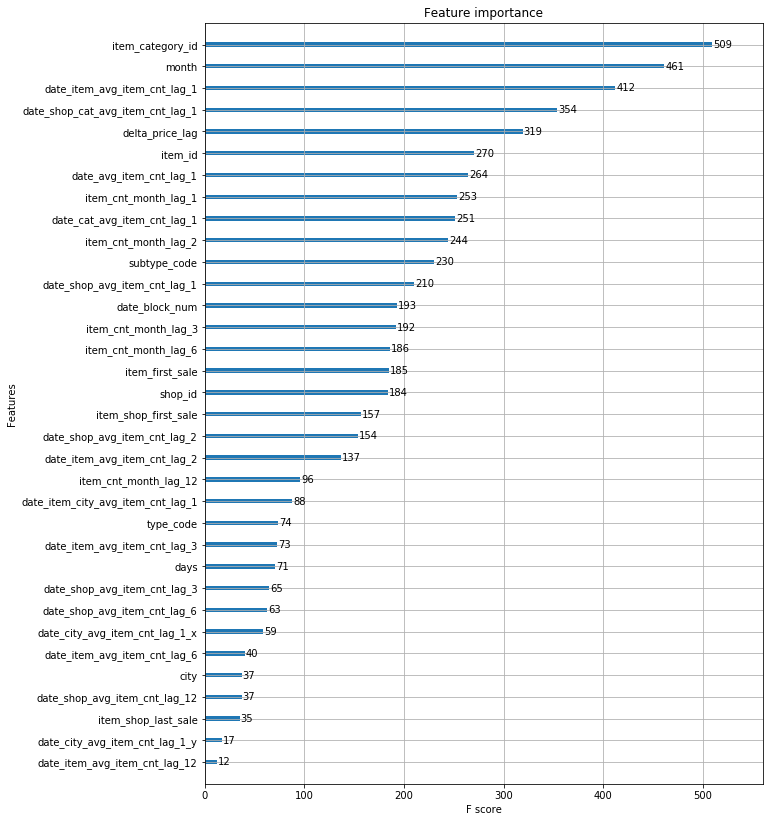

In [149]:
from xgboost import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10,14))
plot_importance(model, ax=ax)

In [150]:
submission.head(3)

,ID,item_cnt_month
0,0,0.522139
1,1,0.446362
2,2,1.022852


> 모델 제출결과 rmse score가 0.91585 나왔습니다.